<a href="https://colab.research.google.com/github/gustavo-freitas0/EA048---Machine-Learning-/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 00

* Image processing
* PyTorch Custom Dataset
* CNN model
* Net aplication
* Analisys

We gone use CNN, Image process, dropout, data augmentation, normalization

Pytorch

---

## Downloads

In [6]:
!pip install gdown

In [7]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [8]:
!pip install --pre pytorch-ignite

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

##Libs

In [9]:
import numpy as np
import gdown
import cv2
import os

from PIL import Image

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision import datasets, transforms
from torchvision.transforms import transforms, ToPILImage

from ignite.engine import Engine, Events, create_supervised_trainer, create_supervised_evaluator
from ignite.handlers import EarlyStopping, ModelCheckpoint
from ignite.metrics import Loss, Accuracy, ConfusionMatrix
from ignite.contrib.handlers import ProgressBar

---

##Data

[DIDA](https://didadataset.github.io/DIDA/)

In [10]:
dataset_dida_10k = '1d-U-lxIoS5QuPEYPvHA2-Bm4pULsTb06'
dataset_dida_10k_id = f'https://drive.google.com/uc?id={dataset_dida_10k}'
gdown.download(dataset_dida_10k_id, 'dataset_dida_10k.zip', quiet=False)
os.rename('dataset_dida_10k.zip', 'dataset_dida_10k.rar')
!unrar x dataset_dida_10k.rar DIDA_dataset/

Downloading...
From (original): https://drive.google.com/uc?id=1d-U-lxIoS5QuPEYPvHA2-Bm4pULsTb06
From (redirected): https://drive.google.com/uc?id=1d-U-lxIoS5QuPEYPvHA2-Bm4pULsTb06&confirm=t&uuid=3a35f06c-4e2e-408f-9c41-a075d639672a
To: /content/dataset_dida_10k.zip
100%|██████████| 10.7M/10.7M [00:00<00:00, 13.4MB/s]


A saída de streaming foi truncada nas últimas 5000 linhas.
Extracting  DIDA_dataset/10000/5/5_102.jpg                                47%  OK 
Extracting  DIDA_dataset/10000/5/5_103.jpg                                47%  OK 
Extracting  DIDA_dataset/10000/5/5_104.jpg                                47%  OK 
Extracting  DIDA_dataset/10000/5/5_105.jpg                                47%  OK 
Extracting  DIDA_dataset/10000/5/5_106.jpg                                47%  OK 
Extracting  DIDA_dataset/10000/5/5_107.jpg                                47%  OK 
Extracting  DIDA_dataset/10000/5/5_108.jpg                                47%  OK 
Extracting  DIDA_dataset/10000/5/5_109.jpg                                47%  OK 
Extracting  DIDA_dataset/10000/5/5_11.jpg                                 47%  OK 
Extracting  DIDA_dataset/10000/5/5_110.jpg                                47%  OK 
Extracting  DIDA_data

MNIST

In [11]:
train_dataset_MNIST = datasets.MNIST(root='./data', download=True)
val_dataset_MNIST = datasets.MNIST(root='./data', download=True, train=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:11<00:00, 891314.07it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 125757.40it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 238233.62it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4198001.05it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



EMNIST

In [12]:
# dataset_EMNIST = datasets.EMNIST(root='./data', split='digits', download=True)

---

## Image processing for DIDA

Below we can see the effect of image process

Select one sample

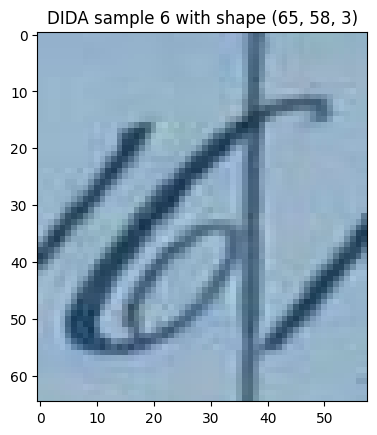

In [13]:
number_ = np.random.randint(10)
sample_ = np.random.randint(1000)
sample_image = cv2.imread(f'DIDA_dataset/10000/{number_}/{number_}_{sample_}.jpg')
plt.figure()
plt.title(f'DIDA sample {number_} with shape {sample_image.shape}')
plt.imshow(sample_image)

To gray scale

In [14]:
sample_image_gray = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)

Invert color - Bitwise not operation

In [15]:
sample_image_invert = cv2.bitwise_not(sample_image_gray)

Blur with Gaussian blurring

In [16]:
sample_image_gaus_blur = cv2.GaussianBlur(sample_image_invert, (3, 3), 0)

Average blur - Bad blur for image proccessing

In [17]:
# sample_image_avg_blur = cv2.blur(sample_image_gaus_blur, (3, 3))

Bilateral filter - better to keep edges sharp

In [18]:
sample_image_bilateral_blur = cv2.bilateralFilter(sample_image_gaus_blur, 1, 25, 25)

Show the result

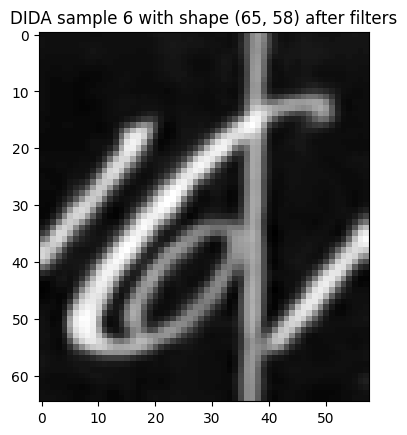

In [19]:
final_image = sample_image_bilateral_blur
plt.figure()
plt.title(f'DIDA sample {number_} with shape {final_image.shape} after filters')
plt.imshow(final_image, cmap='gray')

Sobel edge detection

In [20]:
# sobelx = cv2.Sobel(final_image,cv2.CV_64F,1,0,ksize=3)
# sobely = cv2.Sobel(final_image,cv2.CV_64F,0,1,ksize=3)
sobel = cv2.Sobel(final_image, cv2.CV_64F,1,1,ksize=3)

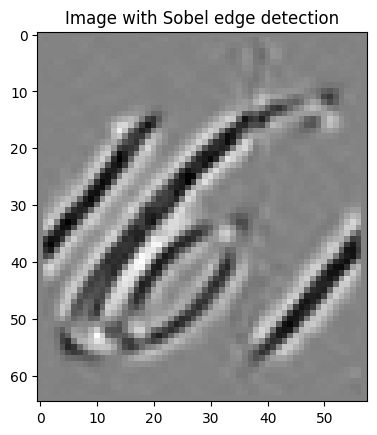

In [21]:
plt.figure()
plt.title(f'Image with Sobel edge detection')
plt.imshow(sobel, cmap='gray')

Canny edge detecion

In [22]:
canny = cv2.Canny(final_image, 100, 150)

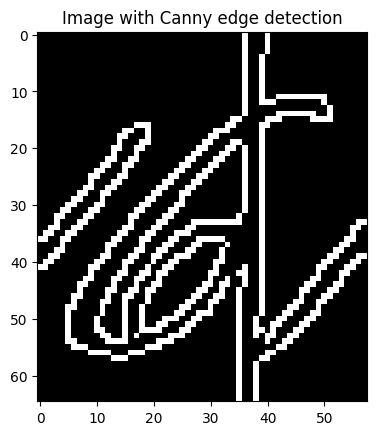

In [23]:
plt.figure()
plt.title(f'Image with Canny edge detection')
plt.imshow(canny, cmap='gray')

##Image processing for MNIST

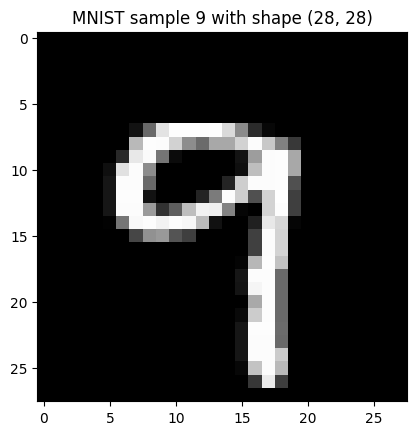

In [24]:
sample_image_mnist, sample_label_mnist = train_dataset_MNIST[np.random.randint(len(train_dataset_MNIST))]
plt.figure()
plt.title(f'MNIST sample {sample_label_mnist} with shape {(sample_image_mnist.size)}')
plt.imshow(sample_image_mnist, cmap='gray')

Convert to numpy array

In [25]:
sample_image_mnist = np.asarray(sample_image_mnist)

The image is on gray scale, so we dont need to convert

Gaussian blur and Bilateral blur

In [26]:
sample_image_mnist_gaus_blur = cv2.GaussianBlur(sample_image_mnist, (3, 3), 0)
sample_image_mnist_bilateral_blur = cv2.bilateralFilter(sample_image_mnist_gaus_blur, 1, 25, 25)

Canny edge detection

In [27]:
canny_mnist = cv2.Canny(sample_image_mnist_bilateral_blur, 100, 150)

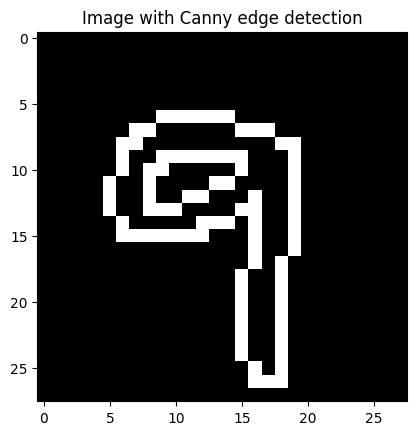

In [28]:
plt.figure()
plt.title(f'Image with Canny edge detection')
plt.imshow(canny_mnist, cmap='gray')

In [29]:
final_image_mnist = Image.fromarray(canny_mnist)

Podemos utilizar estas mesmas ferramentas para processar as imagens do EMNIST

---






## General Image Processing

In [30]:
# directory for image processed
if not os.path.exists('Processed'):
  os.mkdir('Processed')

DIDA:

  * input = nparray
  * convert to gray scale
  * bitwise not
  * gaussian and bilateral blur
  * canny
  * output = nparray

MNIST and EMNIST:

  * input = PIL Image
  * PIL to nparray
  * gaussian and bilateral blur
  * canny
  * convert nparray to PIL
  * output = PIL Image

In [31]:
def apply_image_process_DIDA(path:str='DIDA_dataset/10000/', final_path_:str='DIDA', verbose_:bool=False) -> None:

  if os.path.exists(path):
    if path.endswith('/') == False:
      path += '/'

    final_path = f'Processed/{final_path_}'
    if not final_path.endswith('/'):
      final_path += '/'

    if not os.path.exists(final_path):
      os.mkdir(final_path)

    for number in range(10):
      for sample in range(1, 1001):
        sample_image = cv2.imread(f'{path}{number}/{number}_{sample}.jpg')
        sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
        sample_image = cv2.bitwise_not(sample_image)
        sample_image = cv2.GaussianBlur(sample_image, (3, 3), 0)
        sample_image = cv2.bilateralFilter(sample_image, 1, 25, 25)
        sample_image = cv2.Canny(sample_image, 100, 150)
        if not os.path.exists(f'{final_path}{number}'):
          os.mkdir(f'{final_path}{number}')
        if verbose_: print(f'{final_path}{number}/{number}_{sample}.jpg')
        cv2.imwrite(f'{final_path}{number}/{number}_{sample}.jpg', sample_image)
    print('DIDA image processing done')

  else:
    print(f'Path {path} not found')

def apply_image_process(dataset, final_path:str, verbose_:bool=False) -> None:

  final_path = f'Processed/{final_path}/'
  if not os.path.exists(final_path):
    os.mkdir(final_path)

  for i, (image, label) in enumerate(dataset):
    sample_image = np.asarray(image)
    sample_image = cv2.GaussianBlur(sample_image, (3, 3), 0)
    sample_image = cv2.bilateralFilter(sample_image, 1, 25, 25)
    sample_image = cv2.Canny(sample_image, 100, 150)
    if not os.path.exists(f'{final_path}{label}'):
          os.mkdir(f'{final_path}{label}')
    if verbose_: print(f'{final_path}{label}/{i}_{label}.jpg')
    cv2.imwrite(f'{final_path}{label}/{i}_{label}.jpg', sample_image)

  print('Image processeing done')

Aplicando processamento de imagem no conjunto DIDA

In [32]:
apply_image_process_DIDA()

DIDA image processing done


Aplicando processaento de imagem no conjunto MNIST

In [33]:
apply_image_process(train_dataset_MNIST, 'train')

Image processeing done


para MNIST de validação

In [34]:
apply_image_process(val_dataset_MNIST, 'validation')

Image processeing done


Aplicando processamento de imagem no conjunto EMNIST

In [35]:
# apply_image_process(dataset_EMNIST, 'EMNIST')

---

# CNN

## Dataset

Here we are create a custom dataset for MNIST, EMINIST and DIDA

Precisamos criar subdiretórios em cada dataset com os rótulos

Dps usar ImageFolder do torchvision.datasets



In [60]:
# Caso desejamos poucas amostras para checar se a rede funciona
checking_net = True

In [62]:
class CustomDataset(Dataset):

  def __init__(self, root_dir:str, transform=None, target_transform=None, checking_net_:bool=True,max_samples_per_class:int=100) -> None:
    self.root_dir = root_dir
    self.transform = transform
    self.target_transform = target_transform

    if checking_net_:
      self.classes = os.listdir(self.root_dir)
      self.image_files = []
      self.labels = []

      for label, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            class_images = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]
            class_images.sort(key=lambda x: int(x.split('_')[0]))
            for image_name in class_images[:max_samples_per_class]:
                self.image_files.append(os.path.join(class_dir, image_name))
                self.labels.append(label)

    else:
      self.image_files = [images for images in os.listdir(self.root_dir) if images.endswith('.jpg')]
      self.image_files.sort(key=lambda x: int(x.split('_')[0]))

  def __len__(self):
    return len(self.image_files)

  def __getitem__(self, index):

    image_path = os.path.join(self.root_dir, self.image_files[index])
    image = read_image(image_path)

    label = int(self.image_files[index].split('_')[1].split('.')[0])

    if self.transform:
      image = self.transform(image)

    return image, label

def check_image(dataset) -> None:
  img, label = dataset[np.random.randint(len(dataset))]
  img = ToPILImage()(img)
  plt.figure()
  plt.imshow(img, cmap='gray')
  plt.title(f'Label {label} with size {img.size}')
  plt.show()

Transformações para o conjunto de dados utilizado no treinamento, MNIST

In [38]:
transform_train_data = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.Normalize(mean=[0.1307], std=[0.3081])
])

transform_for_label = transforms.Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

MNIST

In [63]:
dataset_MNIST_train = CustomDataset(root_dir='Processed/train/', transform=transform_train_data, target_transform=transform_for_label, checking_net_=checking_net)
# dataset_MNIST_train = datasets.ImageFolder(root='/content/Processed/train', transform=transform_train_data)

In [65]:
dataset_MNIST_val = CustomDataset(root_dir='Processed/validation/', transform=transforms.ToTensor(), target_transform=transform_for_label, checking_net_=checking_net)
# dataset_MNIST_val = datasets.ImageFolder(root='/content/Processed/validation', transform=transforms.ToTensor())

DIDA

In [66]:
dataset_DIDA = CustomDataset(root_dir='Processed/DIDA/', transform=transforms.ToTensor(), target_transform=transform_for_label, checking_net_=checking_net)
# dataset_DIDA = datasets.ImageFolder(root='/content/Processed/DIDA', transform=transforms.ToTensor())

EMNIST

In [42]:
# dataset_EMNIST = CustomDataset(root_dir='Processed/EMNIST/', transform=transforms.ToTensor(), target_transform=transform_for_label)

##DataLoader

In [68]:
dataloader_train = DataLoader(dataset_MNIST_train, batch_size=64, shuffle=True)
print(f'{len(dataloader_train)} batches of 64 images')
dataloader_val = DataLoader(dataset_MNIST_val, batch_size=64, shuffle=True)
print(f'{len(dataloader_val)} batches of 64 images')
dataloader_DIDA = DataLoader(dataset_DIDA, batch_size=64, shuffle=True)
print(f'{len(dataloader_DIDA)} batches of 64 images')

16 batches of 64 images
16 batches of 64 images
16 batches of 64 images


##Model

Modelo CNN:

... Explicar modelo e parâmetros

Deixar aberto para modificação (poder inserir parâmetros na classe)

In [69]:
class CNN(nn.Module):

  def __init__(self, num_classes:int=10) -> None:
    super(CNN, self).__init__()
    # First convolucional layer with Batch normalization and Dropout
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
    self.bn1 = nn.BatchNorm2d(32)
    self.drop1 = nn.Dropout(p=0.25)

    # Second convolucional layer with Batch normalization and Dropout
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.bn2 = nn.BatchNorm2d(64)
    self.drop2 = nn.Dropout(p=0.25)

    # Polling layer
    self.pool = nn.MaxPool2d(kernel_size=2)

    # Fully connected layer
    self.fc1 = nn.Linear(64*14*14, 128)
    self.drop3 = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(in_features=128, out_features=num_classes)

  def forward(self, x):
    # Convolucion with ReLU, batch normalization and dropout
    x = self.conv1(x)
    x = self.bn1(x)
    x = F.relu(x)
    x = self.drop1(x)

    # Convolucion with ReLU, batch normalization and dropout
    x = self.conv2(x)
    x = self.bn2(x)
    x = F.relu(x)
    x = self.drop2(x)

    # Dimension reduction (reduz consumo computacional)
    x = self.pool(x)

    # Flattening
    x = x.view(x.size(0), -1)

    # Fully connected layer with ReLU and Dropout
    x = self.fc1(x)
    x = F.relu(x)
    x = self.drop3(x)

    # Last layer
    x = self.fc2(x)

    return x

  def state_dict(self):
    state_dict = {
            'conv1.weight': self.conv1.weight,
            'conv1.bias': self.conv1.bias,
            'conv2.weight': self.conv2.weight,
            'conv2.bias': self.conv2.bias,
            'fc1.weight': self.fc1.weight,
            'fc1.bias': self.fc1.bias,
            'fc2.weight': self.fc2.weight,
            'fc2.bias': self.fc2.bias,
            'bn1.weight': self.bn1.weight,
            'bn1.bias': self.bn1.bias,
            'bn1.running_mean': self.bn1.running_mean,
            'bn1.running_var': self.bn1.running_var,
            'bn2.weight': self.bn2.weight,
            'bn2.bias': self.bn2.bias,
            'bn2.running_mean': self.bn2.running_mean,
            'bn2.running_var': self.bn2.running_var,
        }
    return state_dict

Checagem de disponibilidade de GPU para treinamento

In [70]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'cuda'

Criação do modelo

In [71]:
cnn = CNN().to(device)

Função custo - Cross Entropy

In [72]:
criterion_ = nn.CrossEntropyLoss()

Otimizador

In [73]:
optimizer_ = optim.Adam(cnn.parameters(), lr=0.001)

---

## Train and Validation #2

In [74]:
def train_step(engine, batch):
    cnn.train()
    optimizer_.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    y_pred = cnn(x)
    loss = criterion_(y_pred, y)
    loss.backward()
    optimizer_.step()
    return y_pred, y

def val_step(engine, batch):
    cnn.eval()
    x, y = batch
    x, y = x.to(device), y.to(device)
    with torch.no_grad():
        y_pred = cnn(x)
        loss = criterion_(y_pred, y)
    return y_pred, y

# Listas para armazenar as métricas
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Configuração dos engines para treinamento e validação
trainer = Engine(train_step)
evaluator = Engine(val_step)

# Anexando métricas
Accuracy().attach(trainer, 'accuracy')
Loss(criterion_).attach(trainer, 'loss')

# Handler para exibir o progresso
pbar = ProgressBar(persist=True)
pbar.attach(trainer, output_transform=lambda x: {'loss': x[0]})
pbar.attach(evaluator, metric_names=['loss', 'accuracy'])

# Handler para salvar o modelo com o melhor desempenho
best_model_handler = ModelCheckpoint('model_checkpoints/', 'best_model', save_interval=1, n_saved=1, require_empty=False)
evaluator.add_event_handler(Events.COMPLETED, best_model_handler, {'model': cnn})

# Handler para early stopping
early_stopping = EarlyStopping(patience=10, score_function=lambda engine: engine.state.metrics['accuracy'], trainer=trainer)
evaluator.add_event_handler(Events.COMPLETED, early_stopping)

# Evento para coletar métricas de treinamento
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(engine):
    train_loss = engine.state.output[0]
    train_acc = engine.state.metrics['accuracy']  # Suponha que a acurácia já está sendo calculada
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

# Evento para coletar métricas de validação
@evaluator.on(Events.EPOCH_COMPLETED)
def log_validation_results(engine):
    val_loss = engine.state.metrics['loss']
    val_acc = engine.state.metrics['accuracy']
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

In [75]:
trainer.run(dataloader_train, max_epochs=100)

ERROR:ignite.engine.engine.Engine:Current run is terminating due to exception: [Errno 2] No such file or directory: 'Processed/train/Processed/train/1/358_1.jpg'
ERROR:ignite.engine.engine.Engine:Engine run is terminating due to exception: [Errno 2] No such file or directory: 'Processed/train/Processed/train/1/358_1.jpg'


RuntimeError: [Errno 2] No such file or directory: 'Processed/train/Processed/train/1/358_1.jpg'

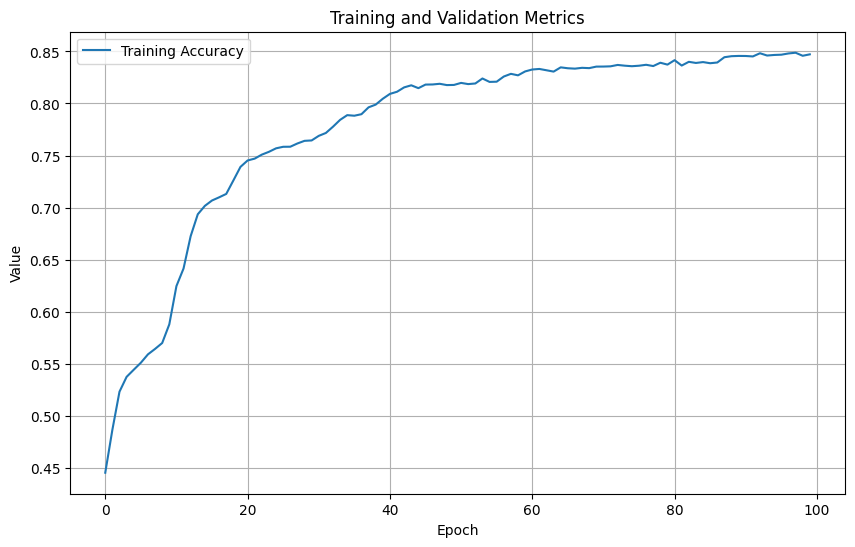

In [ ]:
plt.figure(figsize=(10,6))
# plt.plot(train_losses, label='Training Loss')
plt.plot(train_accuracies, label='Training Accuracy')
# plt.plot(val_losses, label='Validation Loss')
# plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Metrics')
plt.legend()
plt.grid()
plt.show()

## Train and Validation

Functions

In [ ]:
# @title
def train_function(engine, batch):
    cnn.train()
    optimizer_.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    y_pred = cnn(x)
    loss = criterion_(y_pred, y)
    loss.backward()
    optimizer_.step()
    return loss.item()

def evaluation_function(engine, batch):
  cnn.eval()
  with torch.no_grad():
    x, y = batch
    x, y = x.to(device), y.to(device)
    y_pred = cnn(x)
    # Aqui vou passar as probabilidades para one hot encoded
    max_indices = torch.argmax(y_pred, dim=1) # Encontramos o valor máximo para cada linha
    y_one_hot_encoded = torch.zeros_like(y_pred).scatter_(1, max_indices.view(-1, 1), 1.0)  # Criamos um tensor com a mesma forma do y_pred e inserimos um valor de 1 na posição max_indices
    return y_one_hot_encoded, y

# Comentei pq deu ruim quando n uso nenhum técnica (voltar dps)
def score_function(engine):
  val_loss = evaluator.state.metrics['loss']
  # val_loss = engine.state.metrics['loss']
  return -val_loss

Engines para treino e validação (Ignite)

In [ ]:
# @title
# Criando Ignite Engine
trainer = Engine(train_function)
evaluator = Engine(evaluation_function)

Métricas

In [ ]:
# @title
# Métricas de avaliação
train_losses = []
val_losses = []
val_accuracies = []

In [ ]:
# @title
# Anexar as métricas de perda no avaliador
Loss(criterion_).attach(evaluator, 'loss')
# Anexar as métricas de acurácia no avaliador
Accuracy().attach(evaluator, 'accuracy')
# Adicionar barra de progressão (recurso visual)
ProgressBar().attach(trainer)

Early Stopping - verifico o desempenho da rede na validação, e após n épocas (patience) se o modelo não apresentar uma melhora na resposta de perda da função custo o treino é finalizado.

In [ ]:
# @title
# Adiciono o Early Stopping como handler
handler = EarlyStopping(patience=10, score_function=score_function, trainer=trainer)
evaluator.add_event_handler(Events.EPOCH_COMPLETED, handler)

Anotação das métricas

In [ ]:
# @title
best_accuracy = 0.0

@trainer.on(Events.EPOCH_COMPLETED)
def log_metrics(engine):
    evaluator.run(dataloader_val)
    metrics = evaluator.state.metrics
    avg_accuracy = metrics['accuracy']
    avg_loss = metrics['loss']
    train_losses.append(engine.state.output)
    val_losses.append(metrics['loss'])
    val_accuracies.append(metrics['accuracy'])
    global best_accuracy
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        torch.save(cnn.state_dict(), 'best_cnn_model.pth')

Train

In [ ]:
# @title
trainer.run(dataloader_train, max_epochs=100)

[1/938]   0%|           [00:00<?]

[1/938]   0%|           [00:00<?]

[1/938]   0%|           [00:00<?]

[1/938]   0%|           [00:00<?]

[1/938]   0%|           [00:00<?]

[1/938]   0%|           [00:00<?]

[1/938]   0%|           [00:00<?]

[1/938]   0%|           [00:00<?]

[1/938]   0%|           [00:00<?]

[1/938]   0%|           [00:00<?]

[1/938]   0%|           [00:00<?]

[1/938]   0%|           [00:00<?]

2024-07-17 23:58:54,749 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


State:
	iteration: 11256
	epoch: 12
	epoch_length: 938
	max_epochs: 100
	max_iters: <class 'NoneType'>
	output: 0.5322747826576233
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

Checagem do desempenho da rede

In [ ]:
# @title
val_acc = [100*x for x in val_accuracies]
print(max(val_acc))

65.93


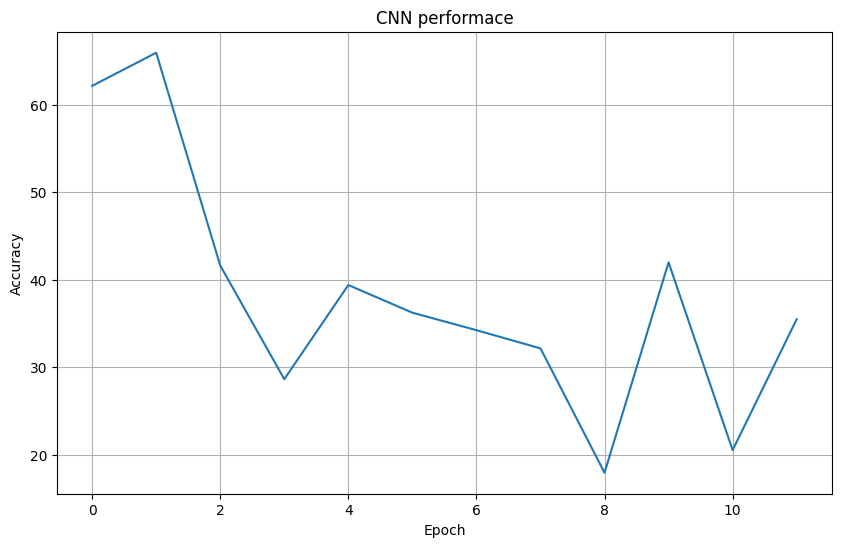

In [ ]:
# @title
plt.figure(figsize=(10,6))
plt.plot(val_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN performace')
plt.grid()
plt.show()

---

## Test

DIDA

In [ ]:
cnn.load_state_dict(best_model_handler)

TypeError: Expected state_dict to be dict-like, got <class 'ignite.handlers.checkpoint.ModelCheckpoint'>.